# Time Series Models

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [4]:
data_clean = '../../data/clean/coffee_store_sales.csv'
num_days = 30

In [5]:
df = pd.read_csv(data_clean)
df['trn_date'] = pd.to_datetime(df['trn_date'])

df = df[['trn_date', 'total_sales']]
df.iloc[[0,-1]]

,trn_date,total_sales
0,2023-01-01,2508.20
180,2023-06-30,5481.32


## Split Data

In [6]:
# Train & Test
df_train = df.iloc[:-num_days]
df_test = df.iloc[-num_days:]

print(f'Train range: {str(df_train.trn_date.min())[0:10]} to {str(df_train.trn_date.max())[0:10]}')
print(f'Test range:  {str(df_test.trn_date.min())[0:10]} to {str(df_test.trn_date.max())[0:10]}')

Train range: 2023-01-01 to 2023-05-31
Test range:  2023-06-01 to 2023-06-30


In [7]:
# ARIMA Datasets
arima_train = df_train.copy()
arima_test = df_test.copy()

arima_train.set_index(arima_train.trn_date, inplace=True)
arima_train.drop(columns=['trn_date'], inplace=True)

arima_test.set_index(arima_test.trn_date, inplace=True)
arima_test.drop(columns=['trn_date'], inplace=True)

arima_train.head(2)

,total_sales
trn_date,
2023-01-01,2508.20
2023-01-02,2403.35


In [8]:
# Prophet Datasets
prophet_train = df_train.copy()
prophet_test = df_test.copy()

prophet_train.columns = ['ds','y']
prophet_test.columns = ['ds','y']

prophet_train.head(2)

,ds,y
0,2023-01-01,2508.20
1,2023-01-02,2403.35


## Analysis

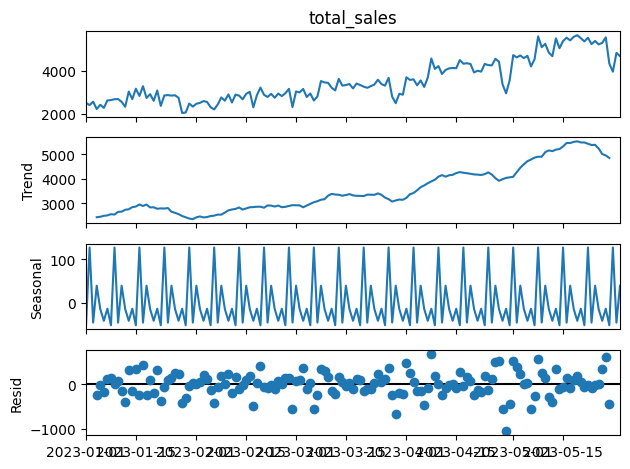

In [9]:
sd_sales = seasonal_decompose(arima_train.total_sales, model='add')
sd_sales.plot();

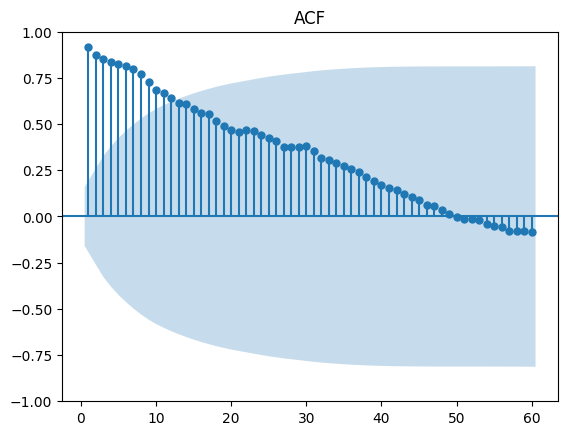

In [10]:
plot_acf(arima_train.total_sales, lags=60, zero=False)
plt.title('ACF')
plt.show()

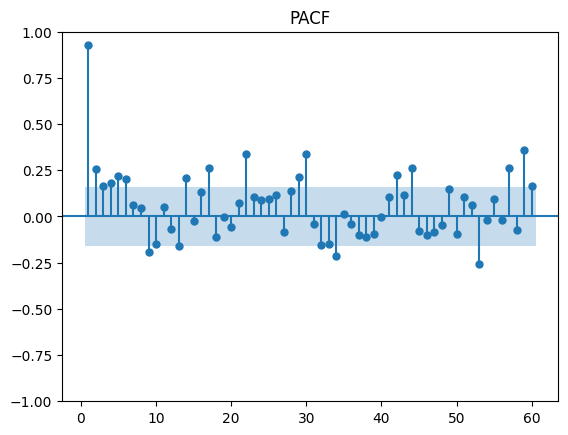

In [11]:
plot_pacf(arima_train.total_sales, lags=60, zero=False, method='ols')
plt.title('PACF')
plt.show()

## ARIMA

In [12]:
model_arima = ARIMA(arima_train, order=(30, 2, 4)).fit()

/Users/zorromac/Documents/Ly-Ax/RetailML/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/zorromac/Documents/Ly-Ax/RetailML/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/zorromac/Documents/Ly-Ax/RetailML/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/zorromac/Documents/Ly-Ax/RetailML/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/U

In [13]:
arima_pred = model_arima.forecast(steps=num_days)

arima_rmse = round(np.sqrt(mean_squared_error(arima_test, arima_pred)),2)
print('ARIMA RMSE:', arima_rmse)

ARIMA RMSE: 306.24


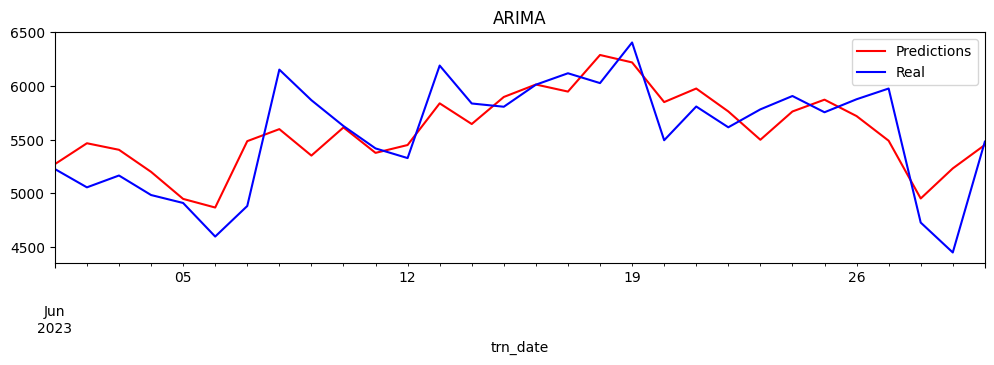

In [14]:
arima_pred.plot(figsize=(12,3), color='red')
arima_test.total_sales.plot(color='blue')

plt.title('ARIMA')
plt.legend(['Predictions','Real'])
plt.show()

## Auto ARIMA

In [ ]:
model_auto = auto_arima(arima_train, start_p=1, start_q=1, max_p=30, max_q=30,
                        max_order=None, start_P=1, start_Q=0, m=10, d=0, D=1)
model_auto.summary()

In [16]:
auto_pred = model_auto.predict(n_periods=num_days)

auto_rmse = round(np.sqrt(mean_squared_error(arima_test, auto_pred)),2)
print('Auto ARIMA RMSE:', auto_rmse)

Auto ARIMA RMSE: 461.74


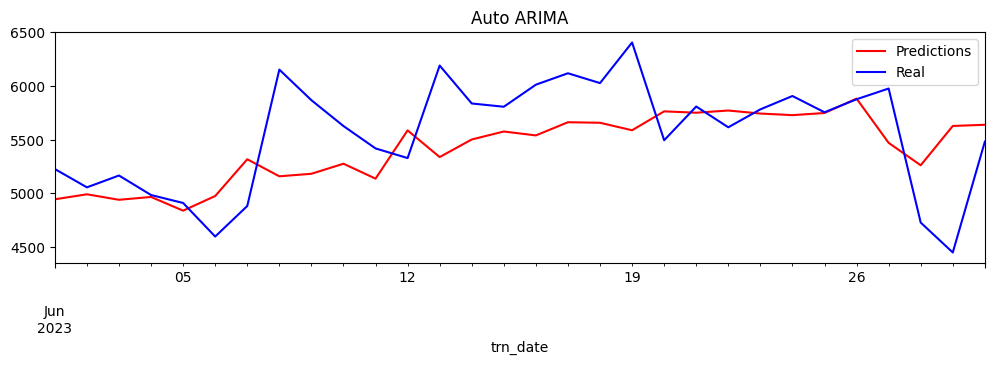

In [17]:
auto_pred.plot(figsize=(12,3), color='red')
arima_test.total_sales.plot(color='blue')

plt.title('Auto ARIMA')
plt.legend(['Predictions','Real'])
plt.show()

## SARIMA

In [18]:
model_sarima = SARIMAX(arima_train, order=(2,1,1), seasonal_order=(1,1,1,12)).fit()

/Users/zorromac/Documents/Ly-Ax/RetailML/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/zorromac/Documents/Ly-Ax/RetailML/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.83182D+00    |proj g|=  8.12310D-02

At iterate    5    f=  6.79616D+00    |proj g|=  1.74231D-03

At iterate   10    f=  6.79593D+00    |proj g|=  2.81788D-03

At iterate   15    f=  6.79479D+00    |proj g|=  1.34187D-02

At iterate   20    f=  6.72971D+00    |proj g|=  1.00109D-01

At iterate   25    f=  6.70769D+00    |proj g|=  6.00445D-03

At iterate   30    f=  6.70542D+00    |proj g|=  1.25767D-02

At iterate   35    f=  6.70503D+00    |proj g|=  2.21086D-03

At iterate   40    f=  6.70497D+00    |proj g|=  4.76511D-04

At iterate   45    f=  6.70495D+00    |proj g|=  4.64731D-05

At iterate   50    f=  6.70495D+00    |proj g|=  2.72081D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/zorromac/Documents/Ly-Ax/RetailML/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
sarima_pred = model_sarima.predict(start=df_test.trn_date.min(), end=df_test.trn_date.max())

sarima_rmse = round(np.sqrt(mean_squared_error(arima_test, sarima_pred)),2)
print('SARIMA RMSE:', sarima_rmse)

SARIMA RMSE: 613.94


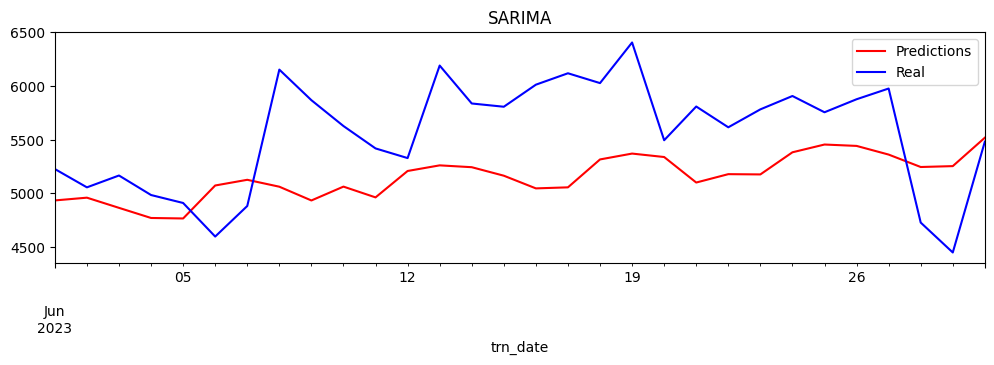

In [20]:
sarima_pred.plot(figsize=(12,3), color='red')
arima_test.total_sales.plot(color='blue')

plt.title('SARIMA')
plt.legend(['Predictions','Real'])
plt.show()

## Prophet

### Tuning

In [27]:
matrix = {
    'yearly_seasonality': ['auto', False, True],
    'weekly_seasonality': ['auto', False, True],
    'seasonality_mode': ['multiplicative', 'additive'],
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 1, 10],
    'seasonality_prior_scale': [0.01, 0.1, 1, 10],
    'holidays_prior_scale': [0.01, 0.1, 1, 10],
    'changepoint_range': [0.8, 0.9, 0.95]
}

In [28]:
params = [dict(zip(matrix.keys(), val)) for val in itertools.product(*matrix.values())]
rmses = []

In [ ]:
for param in params:
    model = Prophet(**param).fit(prophet_train)
    future = model.make_future_dataframe(num_days, freq='D')
    forecast = model.predict(future)
    df_pred = pd.DataFrame(forecast.yhat[-num_days:].values, index=forecast[-num_days:].ds.values)
    rmses.append(np.sqrt(mean_squared_error(prophet_test.y, df_pred.values)))

In [40]:
tuning = pd.DataFrame(params)
tuning["rmse"] = rmses
tuning.sort_values("rmse", inplace=True)
tuning.head(3)

,yearly_seasonality,weekly_seasonality,seasonality_mode,changepoint_prior_scale,seasonality_prior_scale,rmse
63,auto,False,additive,0.001,10.00,540.670113
60,auto,False,additive,0.001,0.01,540.670113
61,auto,False,additive,0.001,0.10,540.670113


### Training

In [21]:
model_prophet = Prophet(yearly_seasonality='auto',
                        weekly_seasonality='auto',
                        seasonality_mode='multiplicative',
                        changepoint_prior_scale=0.01,
                        seasonality_prior_scale=0.01,
                        holidays_prior_scale=0.01,
                        changepoint_range=0.95)
model_prophet.fit(prophet_train)

19:44:38 - cmdstanpy - INFO - Chain [1] start processing
19:44:39 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future = model_prophet.make_future_dataframe(num_days, freq='D')
forecast = model_prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
176,2023-06-26,5609.003249,5050.834093,6145.762878
177,2023-06-27,5567.572759,5030.606352,6099.697357
178,2023-06-28,5628.425343,5096.770176,6146.038779
179,2023-06-29,5623.059231,5072.840882,6178.671812
180,2023-06-30,5618.964668,5081.528009,6104.313254


### Display

/Users/zorromac/Documents/Ly-Ax/RetailML/.venv/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/zorromac/Documents/Ly-Ax/RetailML/.venv/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


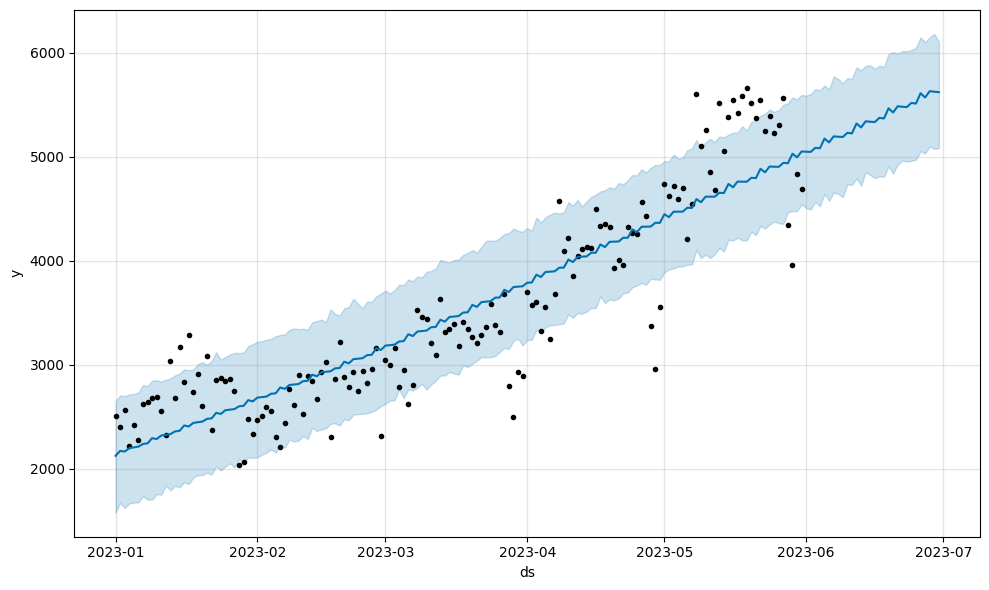

In [23]:
model_prophet.plot(forecast)
plt.show()

/Users/zorromac/Documents/Ly-Ax/RetailML/.venv/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


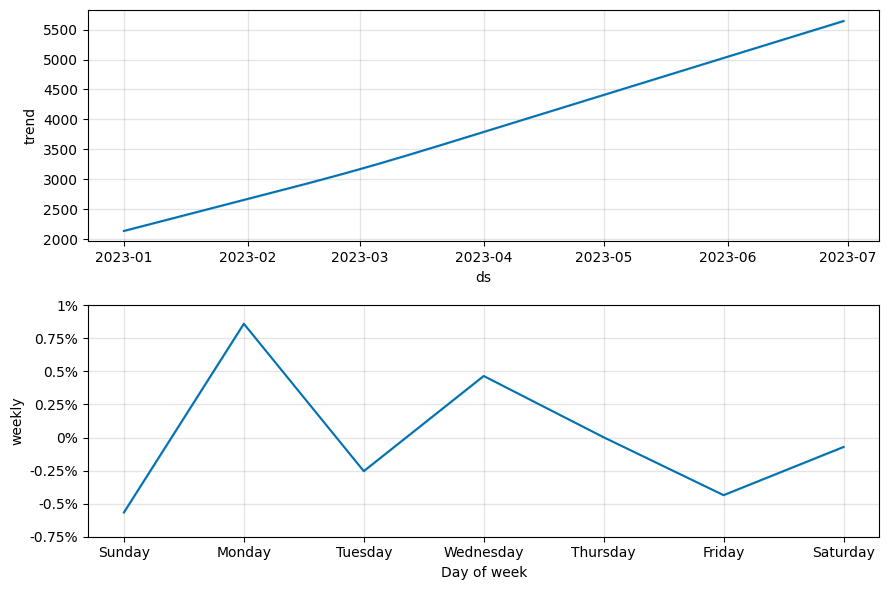

In [24]:
model_prophet.plot_components(forecast)
plt.show()

### Evaluation

In [25]:
prophet_pred = pd.DataFrame(forecast.yhat[-num_days:].values, index=forecast[-num_days:].ds.values)

prophet_rmse = round(np.sqrt(mean_squared_error(prophet_test.y, prophet_pred)),2)
print('Prophet RMSE:', prophet_rmse)

Prophet RMSE: 535.25


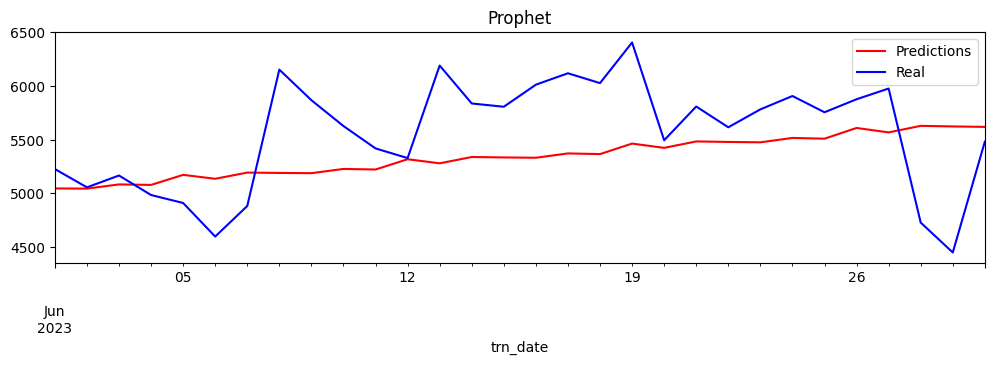

In [26]:
prophet_pred.plot(figsize=(12,3), color='red')
arima_test.total_sales.plot(color='blue')

plt.title('Prophet')
plt.legend(['Predictions','Real'])
plt.show()

## Results

In [27]:
predictions = pd.DataFrame(arima_pred.values, columns=['arima'], index=arima_test.index)
predictions['auto_arima'] = auto_pred.values
predictions['sarima'] = sarima_pred.values
predictions['prophet'] = prophet_pred.values
predictions['test'] = arima_test.total_sales
predictions.head(3)

,arima,auto_arima,sarima,prophet,test
trn_date,,,,,
2023-06-01,5272.151239,4945.431023,4934.844861,5046.362622,5227.00
2023-06-02,5466.635767,4991.939066,4960.529792,5044.791095,5056.50
2023-06-03,5405.862989,4940.795356,4865.812113,5083.824404,5166.65


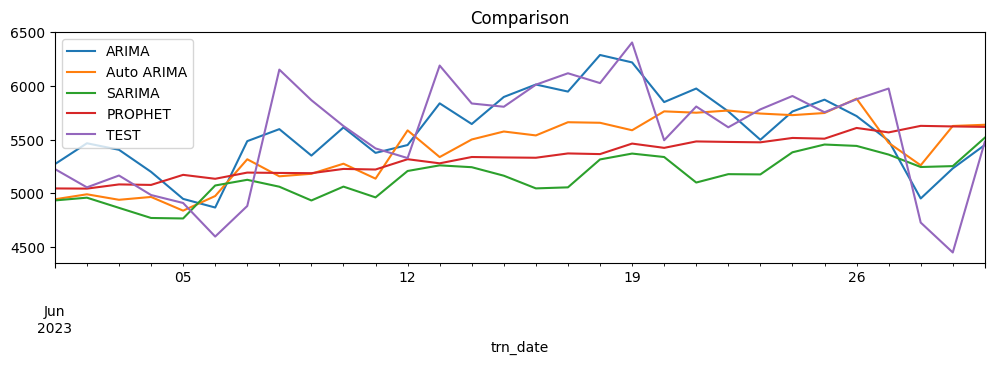

In [28]:
predictions.plot(figsize=(12,3))

plt.title('Comparison')
plt.legend(['ARIMA','Auto ARIMA','SARIMA','PROPHET','TEST'])
plt.show()

In [29]:
print('ARIMA RMSE:', round(arima_rmse,2))
print('Auto ARIMA RMSE:', round(auto_rmse,2))
print('SARIMA RMSE:', round(sarima_rmse,2))
print('PROPHET RMSE:', round(prophet_rmse,2))

ARIMA RMSE: 306.24
Auto ARIMA RMSE: 461.74
SARIMA RMSE: 613.94
PROPHET RMSE: 535.25
